# Generating Synthetic Datasets:

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_st25/blob/main/03_ex/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

## Understanding `make_blobs` in Scikit-learn

In machine learning, especially when developing and testing clustering algorithms, it's useful to work with synthetic datasets where we already know the ground truth. Scikit-learn's `datasets` module provides a handy function called `make_blobs` for this very purpose. This function allows us to generate datasets with "blobs", i.e., groups of points clustered together, where each blob typically represents a distinct class or category.


Specifically, `make_blobs` generates isotropic Gaussian blobs:

- Gaussian: The points within each blob are distributed according to a Gaussian (or normal) distribution. This means points are more likely to be near the center of the blob.
- Isotropic: "Isotropic" means that the standard deviation of the points is the same in all feature dimensions. In simpler terms, the blobs are roughly spherical. If they were anisotropic, they might be elongated or squished in certain directions.

**Exercise** 

- Understand line by line -> Use [perplexity.ai](https://www.perplexity.ai/) for help  
<img src="../assets/data.png" alt="drawing" width="400"/>

- Change `n_samples_val` to a smaller number (e.g., 50) and then a larger one (e.g., 500). How does the density of points change?

- Modify `centers_val` to an integer (e.g., 2, then 5). See how the number of blobs changes and where they are positioned randomly.
- Decrease `cluster_std_val` (e.g., to 0.3). How does this affect the "tightness" of the blobs?
- Run the script multiple times with `random_state_val` set to a specific integer (e.g., 10). The plot should be identical each time.


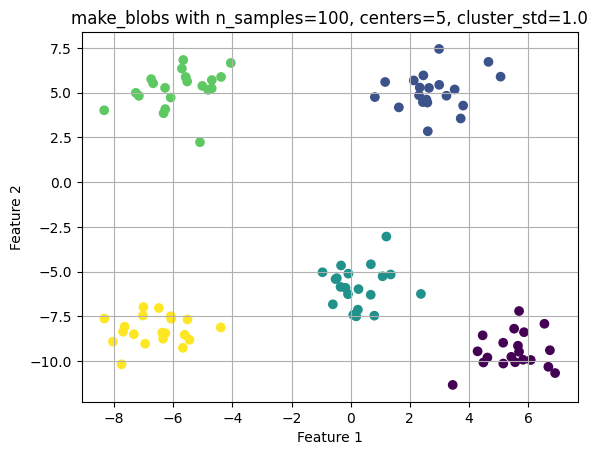

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

# Initial parameters
n_samples_val = 100
centers_val = 5
cluster_std_val = 1.0
n_features_val = 2
random_state_val = 10


data = make_blobs(
    n_samples=n_samples_val,
    centers=centers_val,
    cluster_std=cluster_std_val,
    n_features=n_features_val,
    random_state=random_state_val,
)

column_names = [f"feat{n}" for n in range(data[0].shape[1])]
df_blob = pd.DataFrame(data[0], columns=column_names)
df_blob["target"] = data[1]

if n_features_val == 2:
    plt.scatter(x=df_blob["feat0"], y=df_blob["feat1"], c=df_blob["target"])
    plt.title(
        f"make_blobs with n_samples={n_samples_val}, centers={centers_val}, cluster_std={cluster_std_val}"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()
else:
    print(
        f"Data generated with {n_features_val} features. Add 3D plotting or other analysis for higher dimensions."
    )
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

### Regression Tasks with `make_regression`

Scikit-learn's `datasets` module provides the `make_regression` function, a tool for generating such datasets.

This function creates a set of input features (`X`) and a corresponding continuous target variable (`y`). The target variable is generated as a linear combination of the input features, with optional Gaussian noise added to simulate real-world scenarios where relationships are not perfectly deterministic.

**Exercise** 

- Play with the parameters of `make_regression` and see how the plot changes


,feat0,target
0,0.004291,17.326306
1,-0.255280,-2.844926
2,0.433026,13.484577
3,-0.112272,0.788910
4,0.249179,-0.003591


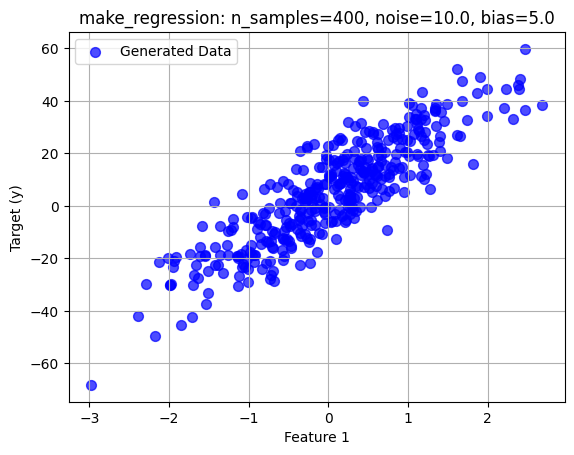

In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Initial parameters
n_samples_val = 400
n_features_val = 1  # Start with 1 feature for easy 2D plotting
n_informative_val = 10
noise_val = 10.0
bias_val = 5.0
random_state_val = 10


data = make_regression(
    n_samples=n_samples_val,
    n_features=n_features_val,
    n_informative=n_informative_val,
    noise=noise_val,
    bias=bias_val,
    random_state=random_state_val,
)

column_names = [f"feat{n}" for n in range(data[0].shape[1])]
df_reg = pd.DataFrame(data[0], columns=column_names)
df_reg["target"] = data[1]
display(df_reg.head())

# Visualize the data (for 1 feature)
if n_features_val == 1:
    plt.scatter(
        df_reg["feat0"],
        df_reg["target"],
        color="blue",
        s=50,
        alpha=0.7,
        label="Generated Data",
    )

    plt.title(
        f"make_regression: n_samples={n_samples_val}, noise={noise_val}, bias={bias_val}"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(
        f"Data generated with {n_features_val} features. No plotting for higher dimensions."
    )

**Exercise** 

- Change `n_samples_val` (e.g., to 20, then to 500). How does the plot change in terms of point density?
- Set `noise_val` to 0.0. What do you observe about the data points relative to the true relationship line?
- Modify `bias_val` (e.g., -10.0, 0.0, 25.0). How does the position of the true relationship line (and the data cloud) shift vertically?
- Run the script multiple times with `random_state_val` set to a fixed integer (e.g., 15). The plot and coefficients should be identical.

### Splitting Data for Model Evaluation with scikit-learn

This guide explains how to split your dataset for model evaluation using the `train_test_split` function from scikit-learn, a common practice in machine learning. We'll also cover how to make your splits reproducible and visualize the results.

Read through [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

<img src="../assets/error_separate_test.drawio.png" alt="drawing" width="500"/>


**Exercise** 

- Divide your dataset so that 80% is used for training the model and 20% is reserved for testing its performance. 
- Ensure that this data split can be reproduced exactly by setting a random_seed (also known as random_state in scikit-learn) to the value of 10.
- Visualize the split by creating a scatter plot of a feature (e.g., feat0) against the target variable (target). Use distinct colors to differentiate between the data points belonging to the training set and the test set, all on the same plot.


- Change split 80/20 to 70/30
- Change random seed to 20, run multiple times
- Run without the random seed, multiple times



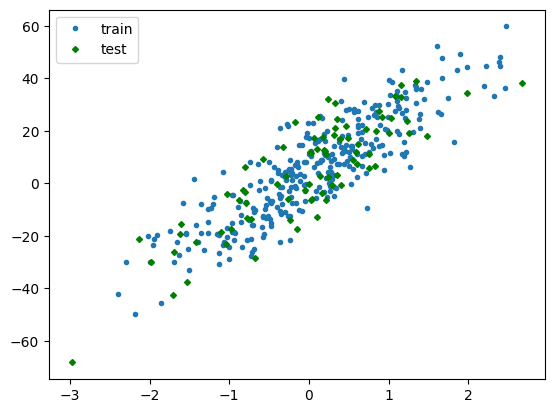

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Use the arguments test_size and random_state in the function
# df_train, df_test = train_test_split(df_reg, ...)

ax.plot(df_train["feat0"], df_train["target"], "o", ms=3, label="train")
ax.plot(df_test["feat0"], df_test["target"], "D", ms=3, color="g", label="test")
ax.legend()

### k-Fold Cross-Validation with scikit-learn

This guide details how to implement k-fold cross-validation for robust model evaluation using the `KFold` class from scikit-learn. We will also discuss how to visualize the data splits for each fold.

Read through the [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) documentation.


<img src="../assets/k-fold.drawio.png" alt="drawing" width="300"/>


**Exercise** 

- Utilize k-fold cross-validation to split your dataset for model evaluation.
- Create a scatter plot of a specific feature (e.g., feat0) against the target variable (target).
- On this plot, use distinct colors to differentiate between the data points belonging to the current fold's training set and its test set.


- Modify the number of folds used in your k-fold cross-validation setup. Experiment with the following values for n_splits: 3, 5, 8, 9, and 10.

Consider when changing `n_splits`:
- Computational Cost: More folds mean more models to train, increasing the overall computation time.
- Bias-Variance Trade-off:
  - A smaller k (e.g., 3) means larger validation sets and smaller training sets for each fold. This can lead to a more biased estimate of model performance (as models are trained on less data) but with lower variance (as the validation sets are larger).
  - A larger k (e.g., 10, or even Leave-One-Out Cross-Validation where k equals the number of samples) means the training sets are very similar to the entire dataset, leading to a less biased estimate. However, the variance of the performance estimate can be higher, and it's computationally more expensive.
  - Dataset Size: If you have a very small dataset, a larger k might result in validation folds that are too small to be representative.


Split 0: Test points: 80 | Train points: 320
Split 1: Test points: 80 | Train points: 320
Split 2: Test points: 80 | Train points: 320
Split 3: Test points: 80 | Train points: 320
Split 4: Test points: 80 | Train points: 320


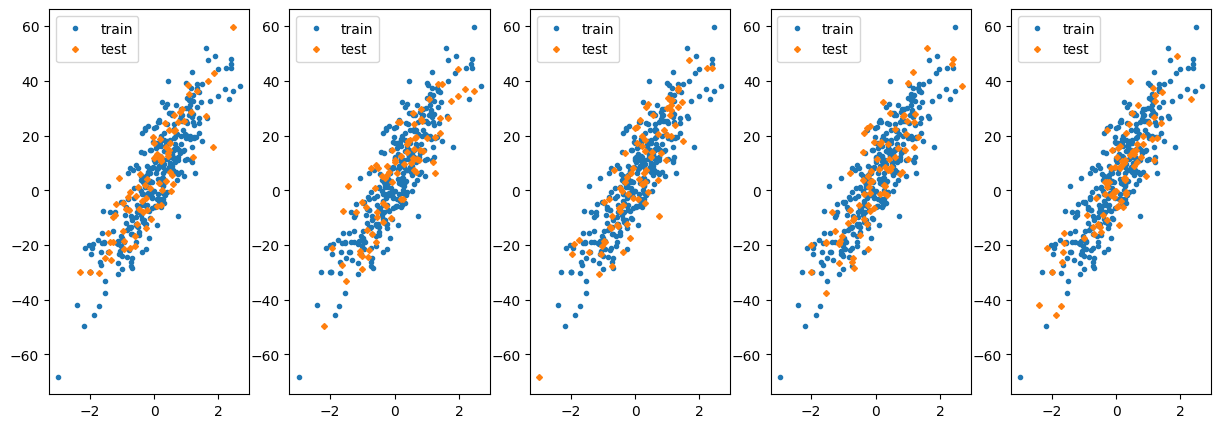

In [8]:
from sklearn.model_selection import KFold

n_splits = 5

fig, axx = plt.subplots(1, n_splits, figsize=(15, 5))

kf = KFold(n_splits=n_splits)

for num, ((train_index, test_index), ax) in enumerate(zip(kf.split(df_reg), axx)):
    df_train = df_reg.iloc[train_index]
    ax.plot(df_train["feat0"], df_train["target"], "o", ms=3, label="train")
    df_test = df_reg.iloc[test_index]
    ax.plot(df_test["feat0"], df_test["target"], "D", ms=3, label="test")
    ax.legend()

    print(f"Split {num}: Test points: {len(df_test)} | Train points: {len(df_train)}")

### Save pandas data frame

**Exercise** 

- Save and read from parquet files (not CSV)

In [5]:
df_reg.to_csv("my_data_delete_later.csv")
pd.read_csv("my_data_delete_later.csv")

,Unnamed: 0,feat0,target
0,0,0.004291,17.326306
1,1,-0.255280,-2.844926
2,2,0.433026,13.484577
3,3,-0.112272,0.788910
4,4,0.249179,-0.003591
...,...,...,...
395,395,1.128785,18.826005
396,396,-0.123070,14.791307
397,397,0.546665,13.221895
398,398,0.044775,-5.776448


**Exercise**

- Use pandas to load the dataset from `https://raw.githubusercontent.com/kuennethgroup/materials_datasets/refs/heads/main/polymer_tendency_to_crystalize/polymers_tend_to_crystalize_format2.json`
- Split the dataset using Sklearn into 80 / 20 
- Make sure the split is consitent when re-exicuting the cell
- Apply a k-fold split to split the dataset into test and train for 5 folds

,smiles,crystalize,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,[*]C[*],47.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[*]CC([*])C,44.47,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[*]CC([*])CC,34.04,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[*]CC([*])CCC,20.01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[*]CC([*])CC(C)C,21.64,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,[*]C([*])(F)F,31.84,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,[*]C/C=C\C[*],25.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(N=Cc3ccc...,29.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(Cc3ccc(N...,21.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
